<a href="https://colab.research.google.com/github/zw2497/Deep-Learning/blob/master/hw1_pretty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import framework

In [56]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-dev20190208


In [0]:
from tensorflow.keras import Model

## Load Data

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Normalize

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Part 1:
### 1. Implement and train a linear model to classify this dataset. Evaluate it by producing a plot that compares the training and validation accuracy. Include this plot with your submission.

#### 1.1 Build linear model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels,validation_data=(test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000==============================] - 3s 56us/sample - loss: 0.6001 - acc: 0.7982 - val_loss: 0.5044 - val_acc: 0.8259
Epoch 2/10
60000/60000==============================] - 3s 55us/sample - loss: 0.4612 - acc: 0.8414 - val_loss: 0.4757 - val_acc: 0.8349
Epoch 3/10
60000/60000==============================] - 3s 54us/sample - loss: 0.4358 - acc: 0.8507 - val_loss: 0.4630 - val_acc: 0.8366
Epoch 4/10
60000/60000==============================] - 3s 54us/sample - loss: 0.4214 - acc: 0.8547 - val_loss: 0.4555 - val_acc: 0.8406
Epoch 5/10
60000/60000==============================] - 3s 55us/sample - loss: 0.4132 - acc: 0.8582 - val_loss: 0.4513 - val_acc: 0.8410
Epoch 6/10
60000/60000==============================] - 3s 54us/sample - loss: 0.4071 - acc: 0.8581 - val_loss: 0.4548 - val_acc: 0.8414
Epoch 7/10
60000/60000==============================] - 3s 54us/sample - loss: 0.4025 - acc: 0.8601 - val_loss: 0.4547 - val_acc

#### 1.2 compares the training and validation accuracy

In [0]:
acc, loss, val_acc, val_loss = history.history['acc'],history.history['loss'],history.history['val_acc'],history.history['val_loss']

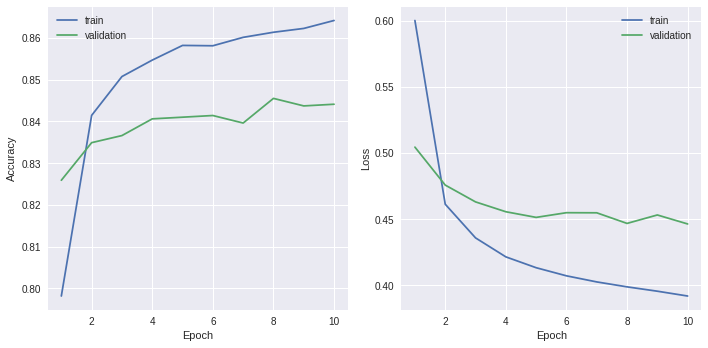

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
epochs = range(1, len(acc) + 1)

ax[0].plot(epochs, acc, label='train')
ax[0].plot(epochs, val_acc, label='validation')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, loss, label='train')
ax[1].plot(epochs, val_loss, label='validation')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.tight_layout()

## 2. Implement and train a deep neural network to classify this dataset. No need to produce plots for this part, just try to get the validation accuracy as high as you can.

In [0]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
history1 = model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000==============================] - 11s 191us/sample - loss: 0.4760 - acc: 0.8285 - val_loss: 0.4104 - val_acc: 0.8506
Epoch 2/10
60000/60000==============================] - 12s 193us/sample - loss: 0.3594 - acc: 0.8680 - val_loss: 0.3804 - val_acc: 0.8657
Epoch 3/10
60000/60000==============================] - 12s 196us/sample - loss: 0.3240 - acc: 0.8805 - val_loss: 0.3773 - val_acc: 0.8643
Epoch 4/10
60000/60000==============================] - 12s 193us/sample - loss: 0.2989 - acc: 0.8896 - val_loss: 0.3443 - val_acc: 0.8801
Epoch 5/10
60000/60000==============================] - 11s 188us/sample - loss: 0.2791 - acc: 0.8962 - val_loss: 0.3501 - val_acc: 0.8747
Epoch 6/10
60000/60000==============================] - 11s 190us/sample - loss: 0.2668 - acc: 0.9006 - val_loss: 0.3347 - val_acc: 0.8813
Epoch 7/10
60000/60000==============================] - 11s 189us/sample - loss: 0.2525 - acc: 0.9058 - val_loss: 0.

In [36]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000==============================] - 1s 75us/sample - loss: 0.3513 - acc: 0.8776
Test accuracy: 0.8776


## 3. Produce a diagram that visualizes your linear and deep models using ​plot_model​. You can find a complete example of how to use plot model ​here​. Include these plots with your submission.


In [0]:
from keras.utils import plot_model
import matplotlib.image as mpimg
plot_model(model, show_shapes=True, to_file='linear.png')
plot_model(model1, show_shapes=True, to_file='deep.png')

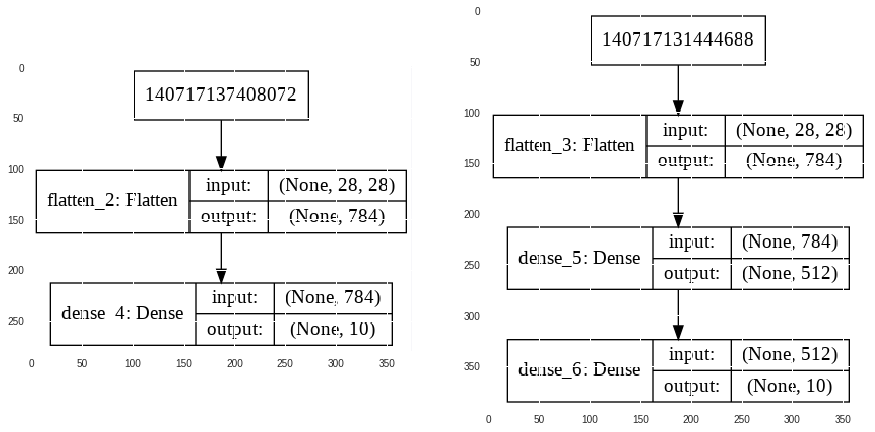

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
_ = ax[0].imshow(mpimg.imread('linear.png'))
_ = ax[1].imshow(mpimg.imread('deep.png'))

## 4. Produce a confusion matrix for one of your models, showing which classes it classifies well, and which it has trouble with. You can reuse the sklearn ​code​ for confusion matrices (it’s great). You’ll just need to use your model to make predictions on the each image in the test set, and compare them with the correct answer. Include the confusion matrix in your submission.

In [0]:
import itertools
from sklearn.metrics import confusion_matrix

In [24]:
predictions_array = model1.predict(test_images)
predictions = np.argmax(predictions_array, 1)
print(predictions.shape)

(10000,)


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.81 0.   0.01 0.04 0.   0.   0.13 0.   0.01 0.  ]
 [0.   0.97 0.   0.02 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.83 0.01 0.07 0.   0.07 0.   0.   0.  ]
 [0.01 0.   0.01 0.93 0.02 0.   0.02 0.   0.   0.  ]
 [0.   0.   0.12 0.04 0.79 0.   0.05 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.98 0.   0.01 0.   0.01]
 [0.09 0.   0.08 0.05 0.07 0.   0.7  0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.05 0.   0.9  0.   0.06]
 [0.01 0.   0.   0.01 0.   0.01 0.01 0.   0.97 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.01 0.   0.97]]


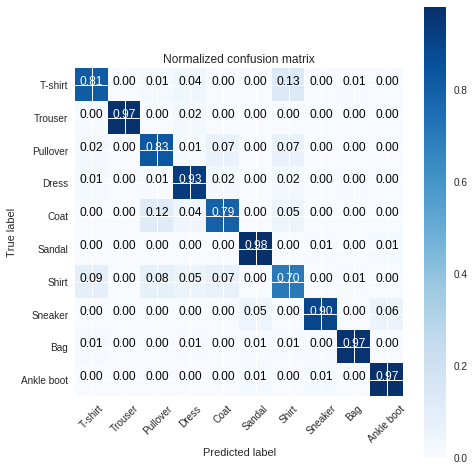

In [26]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, predictions)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

## 4.1 Result:
* **Shirt** is not predicted well. 
* **Sandal, Bag** are good.

# Part 2 ​(50 points)​: ​
Implement and evaluate two models to classify the Fashion MNIST dataset using the Keras Subclassing API.
## 5. Implement and train a linear model to classify this dataset. Evaluate it by producing a plot that compares the training and validation accuracy. Include this plot with your submission.

In [27]:
!pip install tf-nightly-2.0-preview

    100% |████████████████████████████████| 75.8MB 414kB/s 
    100% |████████████████████████████████| 348kB 19.5MB/s 
    100% |████████████████████████████████| 61kB 20.0MB/s 
    100% |████████████████████████████████| 3.2MB 10.4MB/s 


In [28]:
import tensorflow as tf
print("You have version", tf.__version__)
assert tf.__version__ >= "2.0"

import numpy as np
from tensorflow import keras
from tensorflow.keras import Model

You have version 2.0.0-dev20190208


In [0]:
epochs = 10
batch_size = 128
mnist = tf.keras.datasets.fashion_mnist

# Dataset will be cached locally after it's downloaded
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# These types are required for the operation we use later to compute loss.
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

shuffle_buffer = len(x_train)

train_dataset = tf.data.Dataset.from_tensor_slices(
                                    (x_train, y_train)
                                  ).shuffle(shuffle_buffer)
train_dataset = train_dataset.batch(batch_size)

In [0]:
def loss(logits, labels):
  return tf.reduce_mean(
      tf.nn.sparse_softmax_cross_entropy_with_logits(
          logits=logits, labels=labels))

In [0]:
def train_on_batch(model, images, labels):
  with tf.GradientTape() as tape:
    logits = model(images)
    loss_value = loss(logits, labels)
  grads = tape.gradient(loss_value, model.variables)
  #dy_loss/dw
  
  optimizer.apply_gradients(zip(grads, model.variables))
  return loss_value

In [0]:
def calc_accuracy(logits, labels):
  predictions = tf.argmax(logits, axis=1)
  batch_size = int(logits.shape[0])
  acc = tf.reduce_sum(
      tf.cast(tf.equal(predictions, labels), dtype=tf.float32)) / batch_size
  return acc * 100

## 5.1 Implement and train a linear model to classify this dataset. Evaluate it by producing a plot that compares the training and validation accuracy. Include this plot with your submission.

In [0]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = keras.layers.Flatten()   
    self.d1 = keras.layers.Dense(10)
    self.a1 = tf.nn.softmax

  def call(self, x):
    # Unroll the images into arrays
    x = self.flatten(x)
    x = self.d1(x)
    x = self.a1(x)
    return x

In [15]:
model2 = MyModel()
acc = []
val_acc = []

optimizer = tf.keras.optimizers.Adam()

for epoch in range(epochs):
  print('Epoch', epoch + 1)
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_value = train_on_batch(model2, images, labels)
    step = optimizer.iterations.numpy() 
    if step % 100 == 0:
      print('Step %d\tLoss: %.4f' % (step, loss_value))
  
  acc.append(calc_accuracy(model2(x_train), y_train))
  val_acc.append(calc_accuracy(model2(x_test), y_test))
  
  print('Train accuracy %.2f' % calc_accuracy(model2(x_train), y_train))
  print('Test accuracy %.2f\n' % calc_accuracy(model2(x_test), y_test))

Epoch 1
Step 100	Loss: 1.7665
Step 200	Loss: 1.7924
Step 300	Loss: 1.7514
Step 400	Loss: 1.8197
Train accuracy 75.28
Test accuracy 74.63

Epoch 2
Step 500	Loss: 1.7240
Step 600	Loss: 1.7420
Step 700	Loss: 1.7181
Step 800	Loss: 1.7582
Step 900	Loss: 1.6919
Train accuracy 77.01
Test accuracy 76.22

Epoch 3
Step 1000	Loss: 1.7520
Step 1100	Loss: 1.6699
Step 1200	Loss: 1.7110
Step 1300	Loss: 1.6577
Step 1400	Loss: 1.6801
Train accuracy 77.93
Test accuracy 76.87

Epoch 4
Step 1500	Loss: 1.6716
Step 1600	Loss: 1.6940
Step 1700	Loss: 1.7231
Step 1800	Loss: 1.7110
Train accuracy 78.51
Test accuracy 77.45

Epoch 5
Step 1900	Loss: 1.7538
Step 2000	Loss: 1.6921
Step 2100	Loss: 1.6437
Step 2200	Loss: 1.6491
Step 2300	Loss: 1.6628
Train accuracy 78.88
Test accuracy 77.84

Epoch 6
Step 2400	Loss: 1.6610
Step 2500	Loss: 1.6565
Step 2600	Loss: 1.6573
Step 2700	Loss: 1.6915
Step 2800	Loss: 1.6878
Train accuracy 79.18
Test accuracy 78.14

Epoch 7
Step 2900	Loss: 1.6981
Step 3000	Loss: 1.6101
Step 3100	L

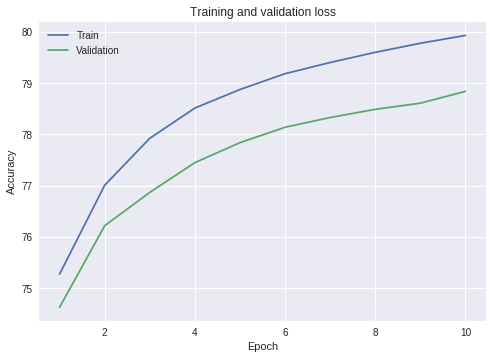

In [18]:
plt.figure()
plt.title('Training and validation loss')
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Train')
plt.plot(epochs, val_acc, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## 5.2 Implement and train a deep model to classify this dataset. No need to produce plots for this part, just try to get the validation accuracy as high as you can.

In [0]:
class MyModel_deep(Model):
  def __init__(self):
    super(MyModel_deep, self).__init__()
    self.flatten = keras.layers.Flatten()
    self.d1 = keras.layers.Dense(512, activation=tf.nn.relu)
    self.d2 = keras.layers.Dense(10, activation=tf.nn.softmax)
  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    return x

In [20]:
model_deep = MyModel_deep()

optimizer = tf.keras.optimizers.Adam()

for epoch in range(5):
  print('Epoch', epoch + 1)
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_value = train_on_batch(model_deep, images, labels)
    step = optimizer.iterations.numpy() 
    if step % 100 == 0:
      print('Step %d\tLoss: %.4f' % (step, loss_value))
  print('Train accuracy %.2f' % calc_accuracy(model_deep(x_train), y_train))
  print('Test accuracy %.2f\n' % calc_accuracy(model_deep(x_test), y_test))

Epoch 1
Step 100	Loss: 1.6773
Step 200	Loss: 1.7460
Step 300	Loss: 1.6694
Step 400	Loss: 1.8014
Train accuracy 74.11
Test accuracy 73.49

Epoch 2
Step 500	Loss: 1.7026
Step 600	Loss: 1.7478
Step 700	Loss: 1.7019
Step 800	Loss: 1.7302
Step 900	Loss: 1.6616
Train accuracy 79.50
Test accuracy 78.22

Epoch 3
Step 1000	Loss: 1.6870
Step 1100	Loss: 1.6283
Step 1200	Loss: 1.6738
Step 1300	Loss: 1.6695
Step 1400	Loss: 1.6499
Train accuracy 79.18
Test accuracy 77.98

Epoch 4
Step 1500	Loss: 1.6494
Step 1600	Loss: 1.6504
Step 1700	Loss: 1.6733
Step 1800	Loss: 1.6683
Train accuracy 80.83
Test accuracy 79.02

Epoch 5
Step 1900	Loss: 1.7314
Step 2000	Loss: 1.6565
Step 2100	Loss: 1.6030
Step 2200	Loss: 1.6215
Step 2300	Loss: 1.6202
Train accuracy 80.96
Test accuracy 79.49



In [0]:
predictions = model_deep.predict(x_test)
print(calc_accuracy(predictions, y_test))

tf.Tensor(85.45, shape=(), dtype=float32)


# EC1
## Provide your own implementation of a squared error loss function, and run an experiment to compare it to cross entropy. What do you find?

## my_squared_error_loss

In [0]:
def my_squared_error_loss(logits, labels, n_classes=10):
  # softmax
  ex = tf.math.exp(logits)
  sm = ex / tf.reduce_sum(ex, axis=1, keepdims=True)
  
  # squared error
  labels = tf.one_hot(labels, n_classes, dtype=tf.float64)
  a = tf.math.abs(labels - sm)
  return tf.reduce_mean(tf.reduce_sum(a * a, axis=1))

### TEST

In [0]:
epochs = 10
batch_size = 128
mnist = tf.keras.datasets.fashion_mnist

# Dataset will be cached locally after it's downloaded
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# These types are required for the operation we use later to compute loss.
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

shuffle_buffer = len(x_train)

train_dataset = tf.data.Dataset.from_tensor_slices(
                                    (x_train, y_train)
                                  ).shuffle(shuffle_buffer)
train_dataset = train_dataset.batch(batch_size)
def built_in_loss(logits, labels):
  return tf.reduce_mean(
      tf.nn.sparse_softmax_cross_entropy_with_logits(
          logits=logits, labels=labels))

def train_on_batch(model, images, labels):
  with tf.GradientTape() as tape:
    # Forward pass
    logits = model(images)
    loss_one = built_in_loss(logits, labels)
    loss_two = my_squared_error_loss(logits, labels)    
    
  # Backward pass
  # I'll use our implementation to update the gradients.
  grads = tape.gradient(loss_two, model.variables)
  optimizer.apply_gradients(zip(grads, model.variables))
  return loss_one, loss_two

def calc_accuracy(logits, labels):
  predictions = tf.argmax(logits, axis=1)
  batch_size = int(logits.shape[0])
  acc = tf.reduce_sum(
      tf.cast(tf.equal(predictions, labels), dtype=tf.float32)) / batch_size
  return acc * 100

class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = keras.layers.Flatten()
    self.d1 = keras.layers.Dense(128, activation=tf.nn.relu)
    self.d2 = keras.layers.Dense(10)
  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    return x

In [0]:
# Loop over the dataset, grab batchs, and train our model
# As we go, verify the loss returned by our implementation is
# the same as the built-in methods.
model_square = MyModel()
optimizer = tf.keras.optimizers.Adam()
EPOCHS = 5

for epoch in range(EPOCHS):
  print("Epoch", epoch + 1, "\n")
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_one, loss_two = train_on_batch(model_square, images, labels)
    
    # You can use something like this as a quick sanity check
#     tf.debugging.assert_near(loss_one, loss_two, atol=0.001, rtol=0.001)
    step = optimizer.iterations.numpy() 
    if step % 100 == 0:
      print("Step", step)
      print("Built-in loss: %.4f, Our loss: %.4f" % (loss_one.numpy(), loss_two.numpy()))
      print("")
      
  print('Train accuracy %.2f' % calc_accuracy(model_square(x_train), y_train))
  print('Test accuracy %.2f\n' % calc_accuracy(model_square(x_test), y_test))

Epoch 1 

Step 100
Built-in loss: 0.5320, Our loss: 0.2659

Step 200
Built-in loss: 0.4934, Our loss: 0.2632

Step 300
Built-in loss: 0.3409, Our loss: 0.1817

Step 400
Built-in loss: 0.3957, Our loss: 0.2140

Train accuracy 85.52
Test accuracy 84.22

Epoch 2 

Step 500
Built-in loss: 0.5093, Our loss: 0.2515

Step 600
Built-in loss: 0.4000, Our loss: 0.2199

Step 700
Built-in loss: 0.4917, Our loss: 0.2536

Step 800
Built-in loss: 0.3692, Our loss: 0.1922

Step 900
Built-in loss: 0.3401, Our loss: 0.1757

Train accuracy 87.26
Test accuracy 85.81

Epoch 3 

Step 1000
Built-in loss: 0.3563, Our loss: 0.1882

Step 1100
Built-in loss: 0.4142, Our loss: 0.2029

Step 1200
Built-in loss: 0.2510, Our loss: 0.1247

Step 1300
Built-in loss: 0.2686, Our loss: 0.1298

Step 1400
Built-in loss: 0.2923, Our loss: 0.1572

Train accuracy 88.00
Test accuracy 86.28

Epoch 4 

Step 1500
Built-in loss: 0.2506, Our loss: 0.1324

Step 1600
Built-in loss: 0.3926, Our loss: 0.1978

Step 1700
Built-in loss: 0.

#### Compare to cross entropy

In [0]:
def train_on_batch(model, images, labels):
  with tf.GradientTape() as tape:
    # Forward pass
    logits = model(images)
    loss_one = built_in_loss(logits, labels)
    loss_two = my_squared_error_loss(logits, labels)    
    
  # Backward pass
  # I'll use our implementation to update the gradients.
  grads = tape.gradient(loss_one, model.variables)
  optimizer.apply_gradients(zip(grads, model.variables))
  return loss_one, loss_two

# Loop over the dataset, grab batchs, and train our model
# As we go, verify the loss returned by our implementation is
# the same as the built-in methods.
model_cross = MyModel()
optimizer = tf.keras.optimizers.Adam()
EPOCHS = 5

for epoch in range(EPOCHS):
  print("Epoch", epoch + 1, "\n")
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_one, loss_two = train_on_batch(model_cross, images, labels)
    
    # You can use something like this as a quick sanity check
#     tf.debugging.assert_near(loss_one, loss_two, atol=0.001, rtol=0.001)
    step = optimizer.iterations.numpy() 
    if step % 100 == 0:
      print("Step", step)
      print("Built-in loss: %.4f, Our loss: %.4f" % (loss_one.numpy(), loss_two.numpy()))
      print("")
      
  print('Train accuracy %.2f' % calc_accuracy(model_cross(x_train), y_train))
  print('Test accuracy %.2f\n' % calc_accuracy(model_cross(x_test), y_test))

Epoch 1 

Step 100
Built-in loss: 0.5295, Our loss: 0.2714

Step 200
Built-in loss: 0.4769, Our loss: 0.2543

Step 300
Built-in loss: 0.3349, Our loss: 0.1818

Step 400
Built-in loss: 0.3969, Our loss: 0.2127

Train accuracy 85.73
Test accuracy 84.32

Epoch 2 

Step 500
Built-in loss: 0.5259, Our loss: 0.2568

Step 600
Built-in loss: 0.3960, Our loss: 0.2215

Step 700
Built-in loss: 0.5246, Our loss: 0.2616

Step 800
Built-in loss: 0.3861, Our loss: 0.1996

Step 900
Built-in loss: 0.3549, Our loss: 0.1835

Train accuracy 87.20
Test accuracy 85.65

Epoch 3 

Step 1000
Built-in loss: 0.3595, Our loss: 0.1939

Step 1100
Built-in loss: 0.4203, Our loss: 0.2007

Step 1200
Built-in loss: 0.2719, Our loss: 0.1339

Step 1300
Built-in loss: 0.2633, Our loss: 0.1367

Step 1400
Built-in loss: 0.2872, Our loss: 0.1589

Train accuracy 87.76
Test accuracy 85.71

Epoch 4 

Step 1500
Built-in loss: 0.2497, Our loss: 0.1375

Step 1600
Built-in loss: 0.3623, Our loss: 0.1920

Step 1700
Built-in loss: 0.

#### They are mostly the same

# EC2
## Provide your own implementation of a Dense layer.

In [0]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs
    
  def build(self, input_shape):
    self.kernel = self.add_variable("kernel", 
                                    shape=[int(input_shape[-1]), 
                                           self.num_outputs])
    
  def call(self, input):
    return tf.matmul(input, self.kernel)

In [0]:
class MyModel_myLayer(Model):
  def __init__(self):
    super(MyModel_myLayer, self).__init__()
    self.flatten = keras.layers.Flatten()
    self.d1 = MyDenseLayer(10)
  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = tf.nn.softmax(x)
    return x

### Test my dense layer

In [0]:
model_myLayer = MyModel_myLayer()
model_myLayer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [70]:
model_myLayer.fit(train_images, train_labels,validation_data=(test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000==============================] - 4s 62us/sample - loss: 0.6047 - acc: 0.7945 - val_loss: 0.5216 - val_acc: 0.8172
Epoch 2/10
60000/60000==============================] - 3s 57us/sample - loss: 0.4702 - acc: 0.8399 - val_loss: 0.4840 - val_acc: 0.8332
Epoch 3/10
60000/60000==============================] - 3s 57us/sample - loss: 0.4461 - acc: 0.8471 - val_loss: 0.4905 - val_acc: 0.8266
Epoch 4/10
60000/60000==============================] - 3s 57us/sample - loss: 0.4341 - acc: 0.8505 - val_loss: 0.4699 - val_acc: 0.8381
Epoch 5/10
60000/60000==============================] - 4s 58us/sample - loss: 0.4270 - acc: 0.8534 - val_loss: 0.4636 - val_acc: 0.8414
Epoch 6/10
60000/60000==============================] - 3s 58us/sample - loss: 0.4205 - acc: 0.8558 - val_loss: 0.4600 - val_acc: 0.8400
Epoch 7/10
60000/60000==============================] - 3s 58us/sample - loss: 0.4151 - acc: 0.8570 - val_loss: 0.4893 - val_acc

# EC3
## Visualize the learned weights.

In [0]:
for layer in model1.layers: 
  weights = layer.get_weights()

In [0]:
layer1 = model1.layers[0].get_weights()
layer2 = model1.layers[1].get_weights()

In [0]:
W = layer2[0]

In [0]:
im = W[:,1].reshape(28,28)

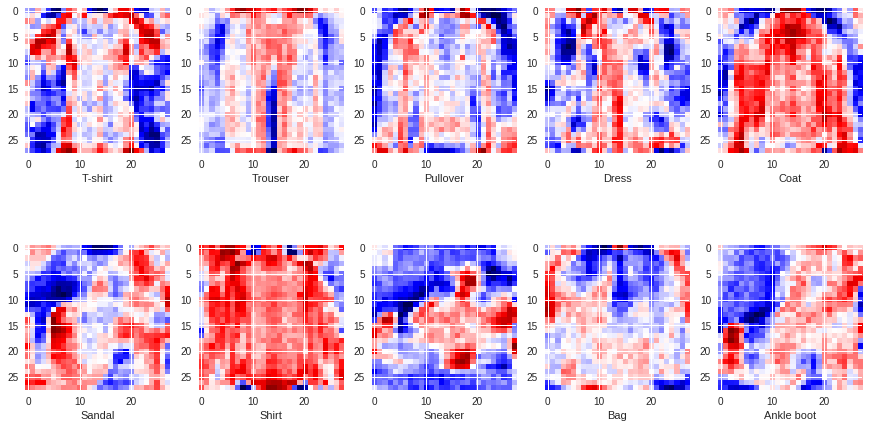

In [0]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig, ax = plt.subplots(2,5,figsize=(15,8))
for i in range(2):
  for j in range(5):
    im = W[:,i*5 + j].reshape(28,28)
    ax[i][j].imshow(im, cmap = plt.get_cmap('seismic'))
    ax[i][j].set_xlabel(class_names[i*5 + j])